In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.integrate import quad

#  Основная форма и параметры

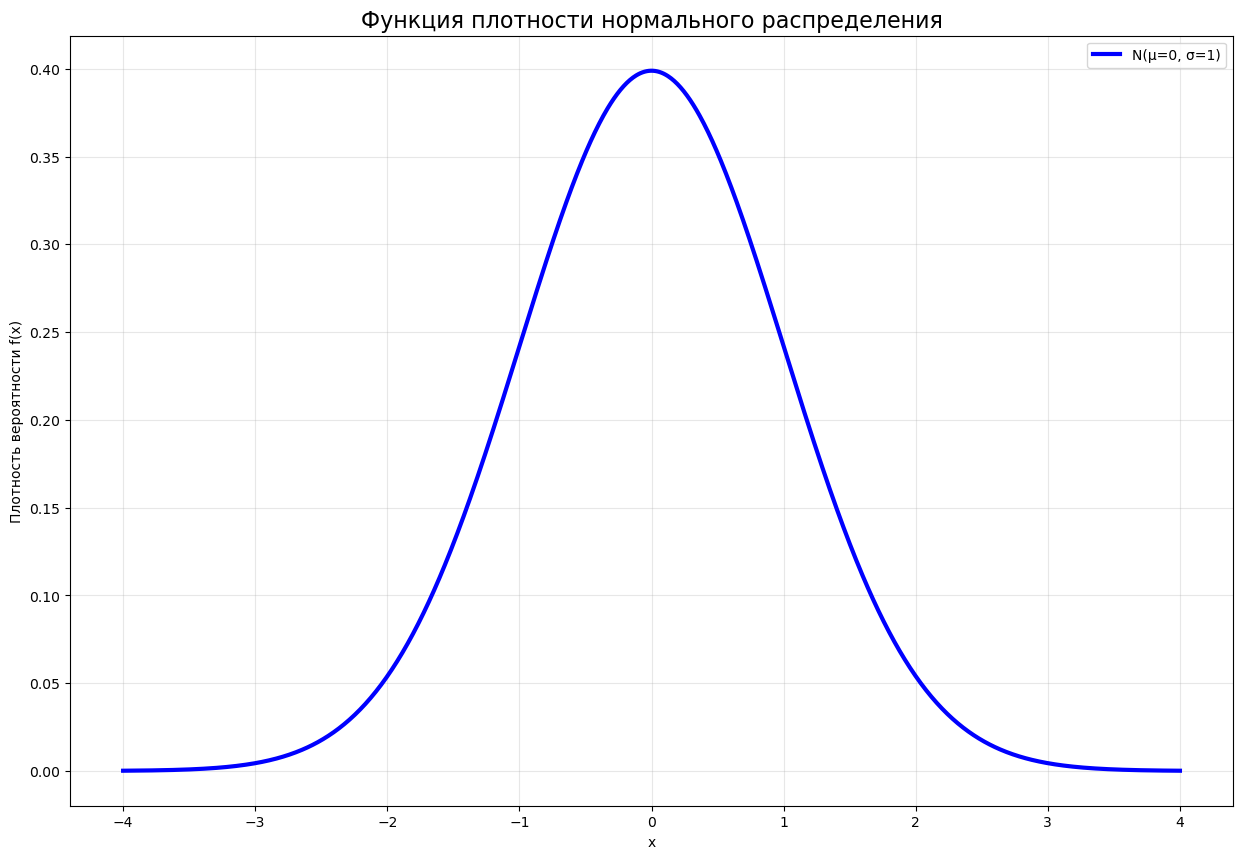

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.integrate import quad

plt.figure(figsize=(15, 10))

# Параметры нормального распределения
mu = 0      # среднее
sigma = 1   # стандартное отклонение

# Создаем точки для графика
x = np.linspace(-4, 4, 1000)
y = stats.norm.pdf(x, mu, sigma)

plt.plot(x, y, 'b-', linewidth=3, label=f'N(μ={mu}, σ={sigma})')
plt.title('Функция плотности нормального распределения', fontsize=16)
plt.xlabel('x')
plt.ylabel('Плотность вероятности f(x)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

# Влияние параметров μ и σ

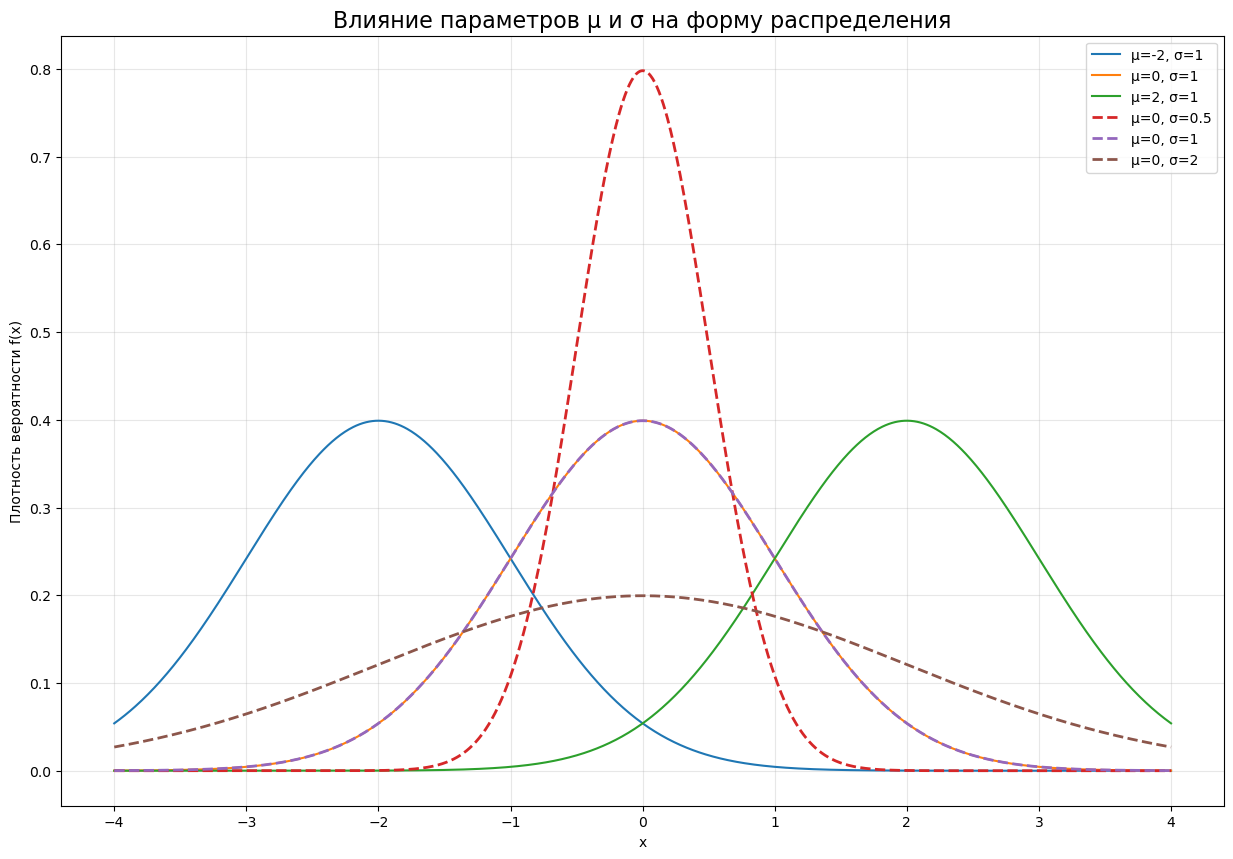

In [3]:
plt.figure(figsize=(15, 10))

# Разные средние (μ)
mus = [-2, 0, 2]
sigma_fixed = 1
for mu in mus:
    y = stats.norm.pdf(x, mu, sigma_fixed)
    plt.plot(x, y, label=f'μ={mu}, σ={sigma_fixed}')

# Разные стандартные отклонения (σ)
sigmas = [0.5, 1, 2]
mu_fixed = 0
for sigma in sigmas:
    y = stats.norm.pdf(x, mu_fixed, sigma)
    plt.plot(x, y, '--', linewidth=2, label=f'μ={mu_fixed}, σ={sigma}')

plt.title('Влияние параметров μ и σ на форму распределения', fontsize=16)
plt.xlabel('x')
plt.ylabel('Плотность вероятности f(x)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


# Правило 68-95-99.7 (Правило трех сигм)

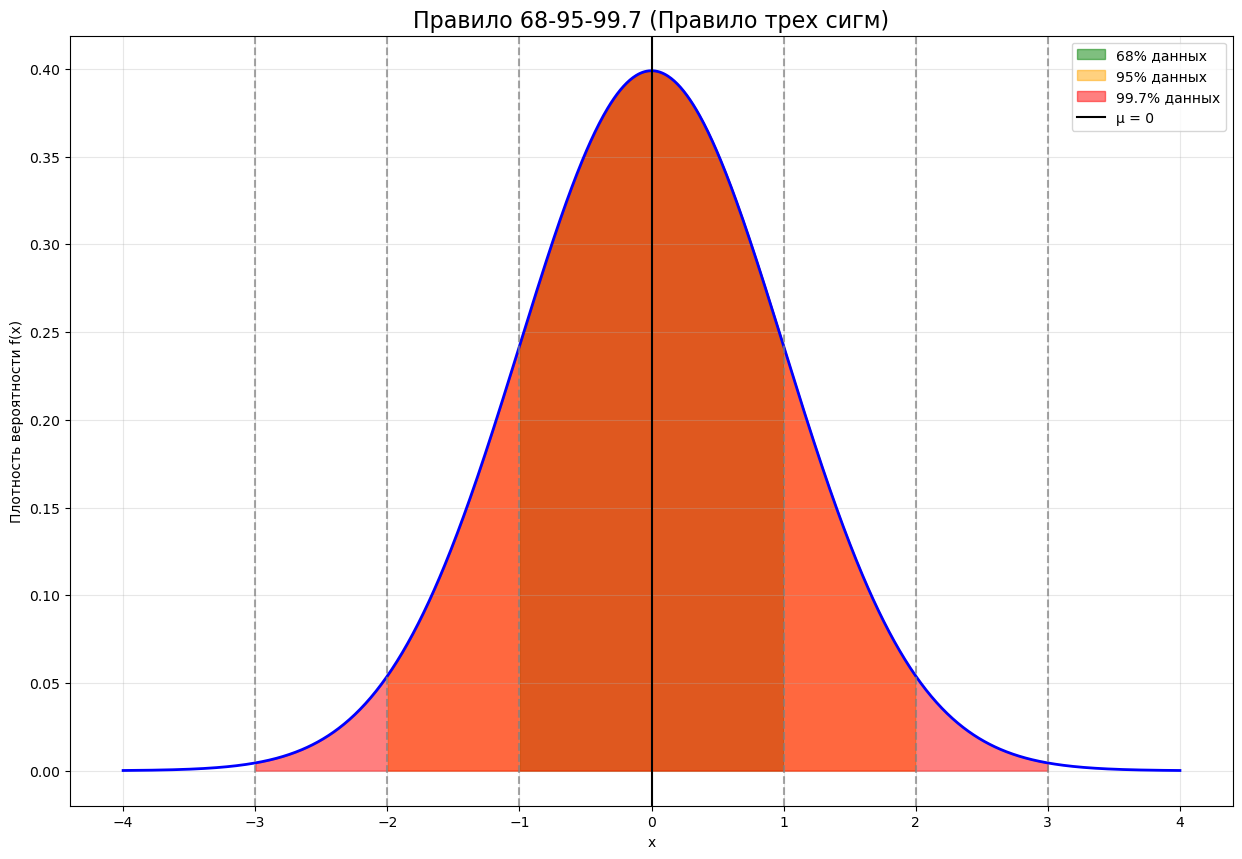

In [5]:
def plot_sigma_rules(mu=0, sigma=1):
    plt.figure(figsize=(15, 10))
    x = np.linspace(mu-4*sigma, mu+4*sigma, 1000)
    y = stats.norm.pdf(x, mu, sigma)
    
    plt.plot(x, y, 'b-', linewidth=2)
    # Зоны для разных сигм
    colors = ['green', 'orange', 'red']
    sigma_ranges = [(mu-sigma, mu+sigma), (mu-2*sigma, mu+2*sigma), (mu-3*sigma, mu+3*sigma)]
    labels = ['68% данных', '95% данных', '99.7% данных']
    
    for i, (start, end) in enumerate(sigma_ranges):
        mask = (x >= start) & (x <= end)
        plt.fill_between(x[mask], y[mask], alpha=0.5, color=colors[i], label=labels[i])
    
    # Вертикальные линии
    for i in range(-3, 4):
        if i != 0:
            plt.axvline(mu + i*sigma, color='gray', linestyle='--', alpha=0.7)
    
    plt.axvline(mu, color='black', linestyle='-', label=f'μ = {mu}')
    plt.title('Правило 68-95-99.7 (Правило трех сигм)', fontsize=16)
    plt.xlabel('x')
    plt.ylabel('Плотность вероятности f(x)')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.show()

plot_sigma_rules()

# Кумулятивная функция распределения (CDF)

<Figure size 1500x1000 with 0 Axes>

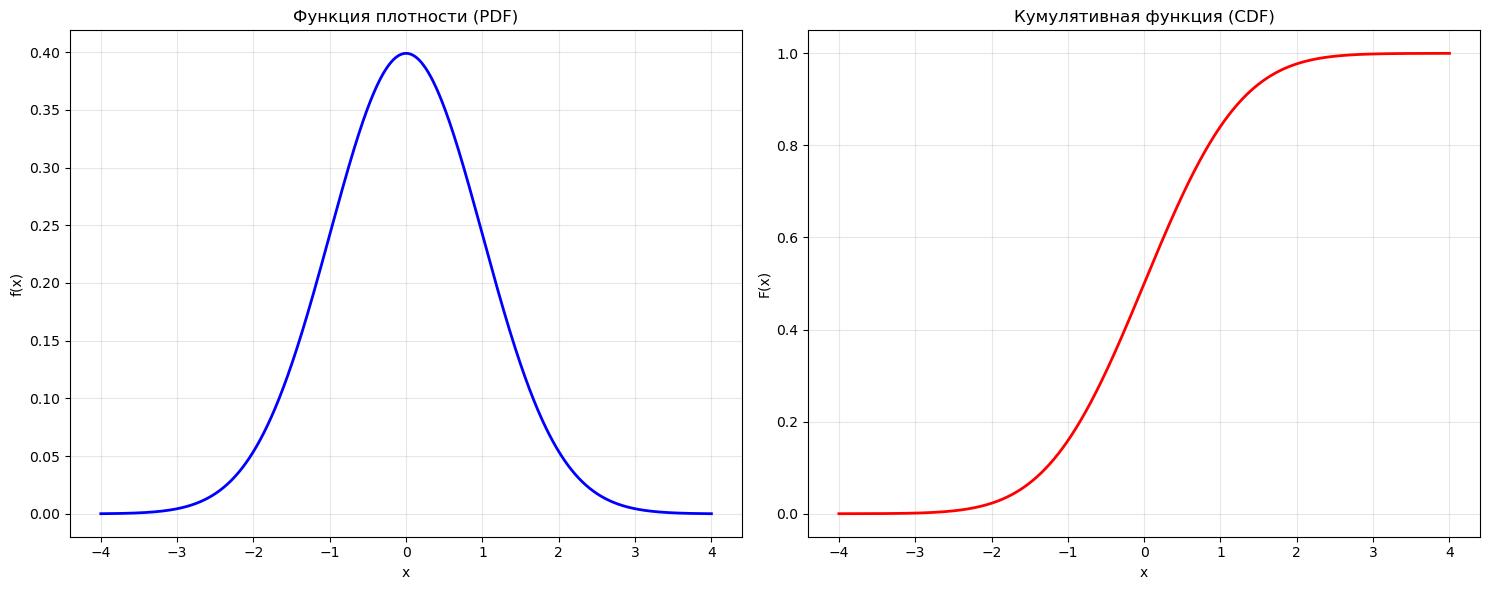

In [6]:
plt.figure(figsize=(15, 10))

# PDF и CDF
x = np.linspace(-4, 4, 1000)
pdf = stats.norm.pdf(x, 0, 1)
cdf = stats.norm.cdf(x, 0, 1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# PDF
ax1.plot(x, pdf, 'b-', linewidth=2)
ax1.set_title('Функция плотности (PDF)')
ax1.set_xlabel('x')
ax1.set_ylabel('f(x)')
ax1.grid(True, alpha=0.3)

# CDF
ax2.plot(x, cdf, 'r-', linewidth=2)
ax2.set_title('Кумулятивная функция (CDF)')
ax2.set_xlabel('x')
ax2.set_ylabel('F(x)')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Генерация случайных чисел

<Figure size 1500x1000 with 0 Axes>

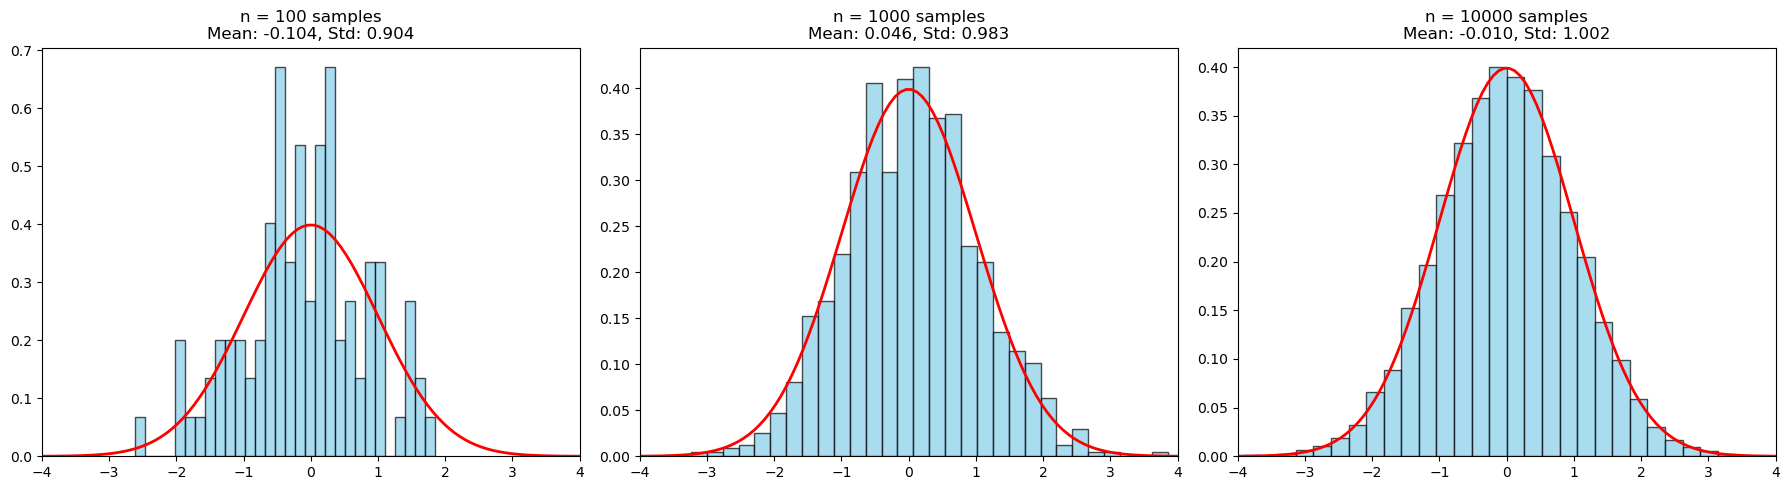

In [7]:
plt.figure(figsize=(15, 10))

# Генерируем случайные числа из нормального распределения
np.random.seed(42)
samples_100 = np.random.normal(0, 1, 100)
samples_1000 = np.random.normal(0, 1, 1000)
samples_10000 = np.random.normal(0, 1, 10000)

# Строим гистограммы
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, (samples, n) in enumerate(zip([samples_100, samples_1000, samples_10000], 
                                   [100, 1000, 10000])):
    axes[i].hist(samples, bins=30, density=True, alpha=0.7, color='skyblue', edgecolor='black')
    
    # Теоретическая кривая
    x = np.linspace(-4, 4, 100)
    y = stats.norm.pdf(x, 0, 1)
    axes[i].plot(x, y, 'r-', linewidth=2)
    
    axes[i].set_title(f'n = {n} samples\nMean: {np.mean(samples):.3f}, Std: {np.std(samples):.3f}')
    axes[i].set_xlim(-4, 4)

plt.tight_layout()
plt.show()

# Сумма нормальных распределений

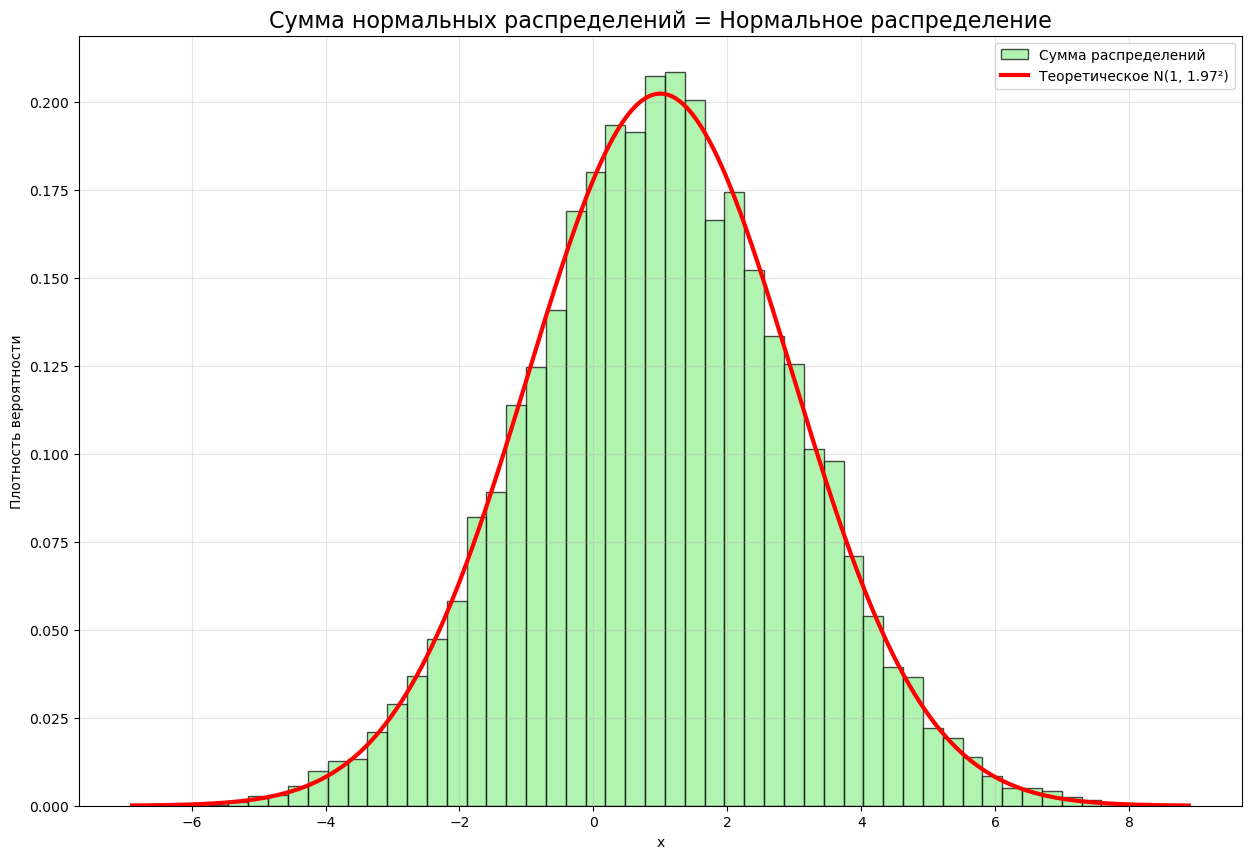

In [8]:
plt.figure(figsize=(15, 10))

# Сумма нормальных распределений тоже нормальна
np.random.seed(42)

# Генерируем несколько нормальных распределений
n_samples = 10000
dist1 = np.random.normal(0, 1, n_samples)
dist2 = np.random.normal(2, 1.5, n_samples)
dist3 = np.random.normal(-1, 0.8, n_samples)

# Сумма распределений
sum_dist = dist1 + dist2 + dist3

# Теоретические параметры суммы
mu_sum = 0 + 2 + (-1)  # сумма средних
sigma_sum = np.sqrt(1**2 + 1.5**2 + 0.8**2)  # квадратичная сумма стандартных отклонений

# Строим гистограмму
plt.hist(sum_dist, bins=50, density=True, alpha=0.7, color='lightgreen', 
         edgecolor='black', label='Сумма распределений')

# Теоретическая кривая суммы
x = np.linspace(mu_sum - 4*sigma_sum, mu_sum + 4*sigma_sum, 1000)
y = stats.norm.pdf(x, mu_sum, sigma_sum)
plt.plot(x, y, 'r-', linewidth=3, label=f'Теоретическое N({mu_sum}, {sigma_sum:.2f}²)')

plt.title('Сумма нормальных распределений = Нормальное распределение', fontsize=16)
plt.xlabel('x')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Квантили и процентили

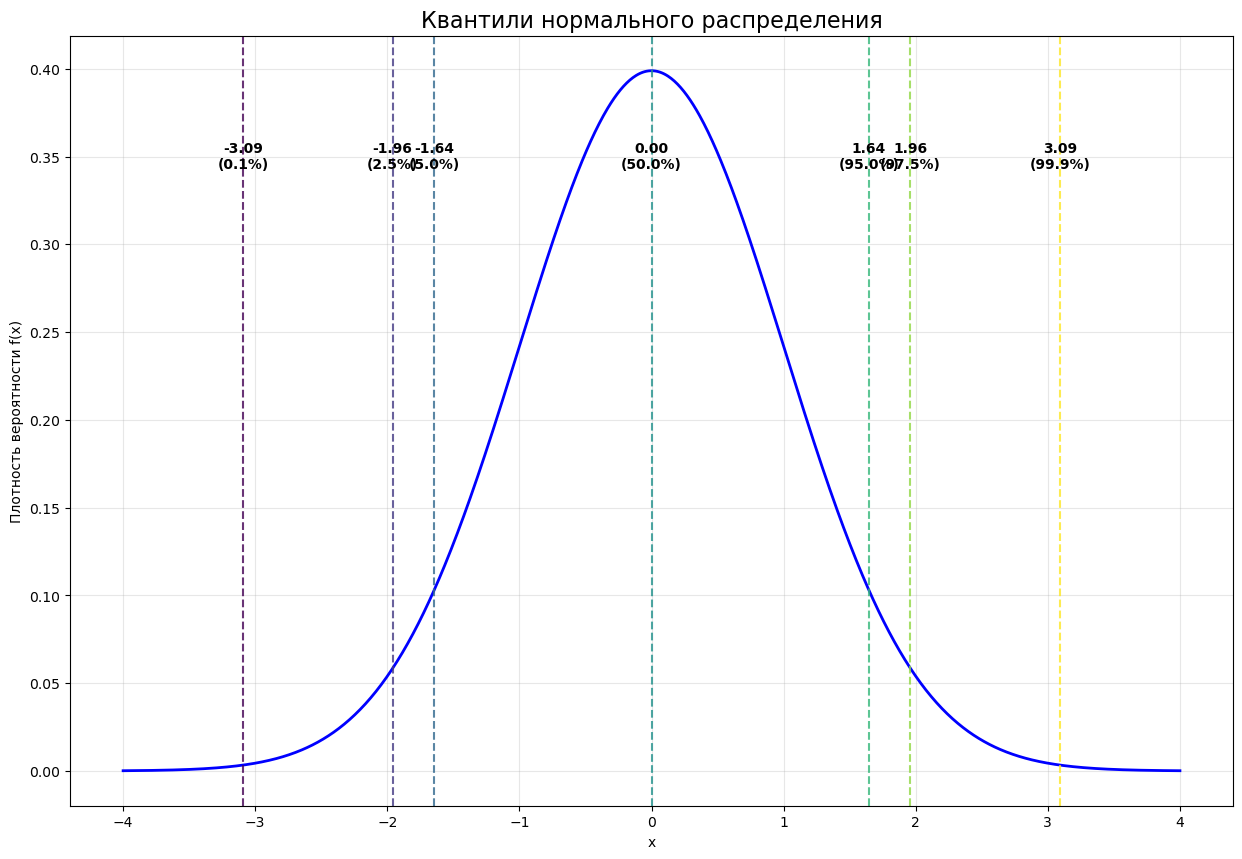

In [9]:
plt.figure(figsize=(15, 10))

# Важные квантили нормального распределения
quantiles = [0.001, 0.025, 0.05, 0.5, 0.95, 0.975, 0.999]
quantile_values = stats.norm.ppf(quantiles)

x = np.linspace(-4, 4, 1000)
y = stats.norm.pdf(x, 0, 1)

plt.plot(x, y, 'b-', linewidth=2)

# Отмечаем квантили
colors = plt.cm.viridis(np.linspace(0, 1, len(quantiles)))
for i, (q, q_val) in enumerate(zip(quantiles, quantile_values)):
    plt.axvline(q_val, color=colors[i], linestyle='--', alpha=0.8)
    plt.text(q_val, 0.35, f'{q_val:.2f}\n({q*100:.1f}%)', 
             ha='center', va='center', fontweight='bold')

plt.title('Квантили нормального распределения', fontsize=16)
plt.xlabel('x')
plt.ylabel('Плотность вероятности f(x)')
plt.grid(True, alpha=0.3)
plt.show()

# Сравнение с другими распределениями


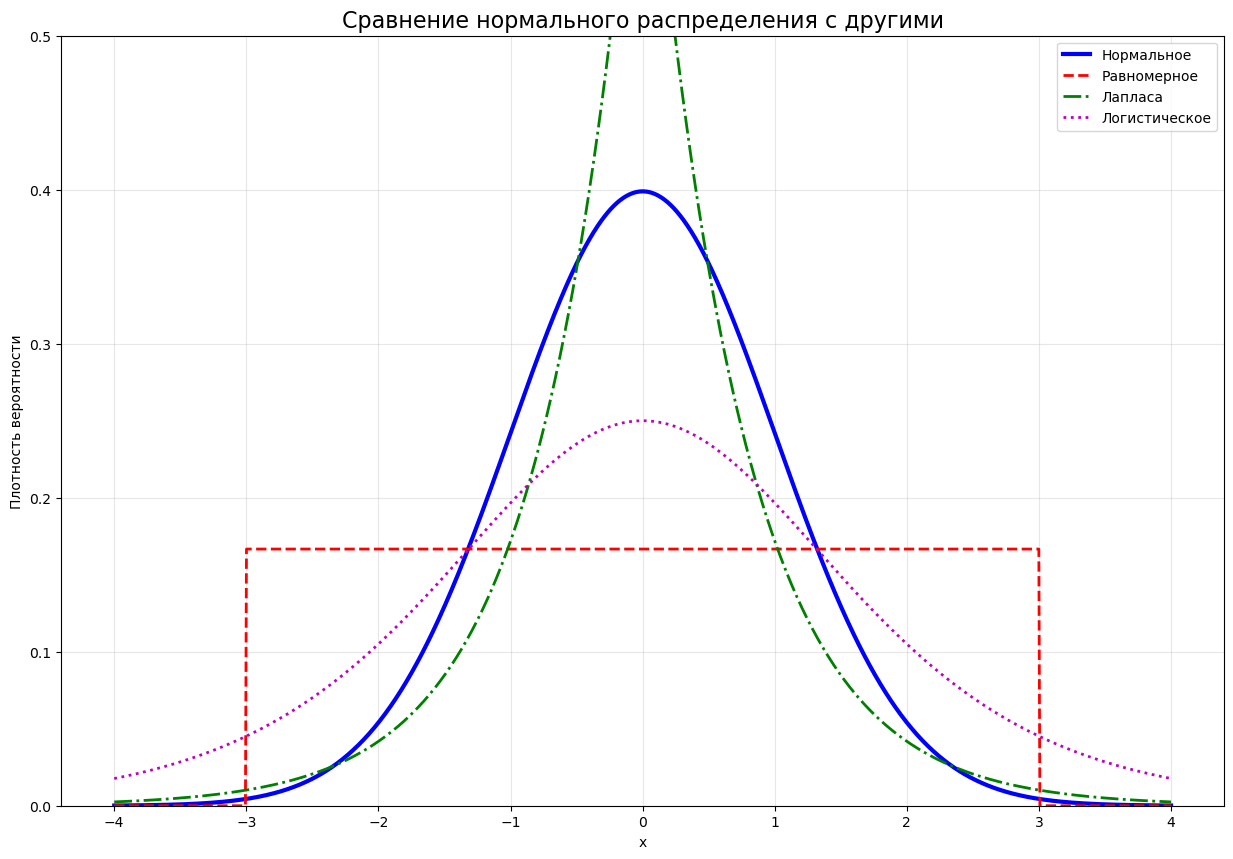

In [10]:
plt.figure(figsize=(15, 10))

# Сравнение с другими распределениями
x = np.linspace(-4, 4, 1000)

# Нормальное распределение
y_norm = stats.norm.pdf(x, 0, 1)

# Другие распределения (нормализованные)
y_uniform = stats.uniform.pdf(x, -3, 6)  # равномерное
y_laplace = stats.laplace.pdf(x, 0, 1/np.sqrt(2))  # Лапласа
y_logistic = stats.logistic.pdf(x, 0, 1)  # логистическое

plt.plot(x, y_norm, 'b-', linewidth=3, label='Нормальное')
plt.plot(x, y_uniform, 'r--', linewidth=2, label='Равномерное')
plt.plot(x, y_laplace, 'g-.', linewidth=2, label='Лапласа')
plt.plot(x, y_logistic, 'm:', linewidth=2, label='Логистическое')

plt.title('Сравнение нормального распределения с другими', fontsize=16)
plt.xlabel('x')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(0, 0.5)
plt.show()

#  Проверка свойств математически

In [11]:

mu, sigma = 0, 1

# 1. Симметричность
print("1. Симметричность:")
print(f"   f({mu} + a) = f({mu} - a)")
print(f"   Пример: f(1) = {stats.norm.pdf(1, mu, sigma):.6f}")
print(f"           f(-1) = {stats.norm.pdf(-1, mu, sigma):.6f}")

# 2. Площадь под кривой = 1
area, _ = quad(lambda x: stats.norm.pdf(x, mu, sigma), -np.inf, np.inf)
print(f"\n2. Площадь под кривой: {area:.8f} (должна быть 1)")

# 3. Математическое ожидание и дисперсия
print(f"\n3. Математическое ожидание: E[X] = {mu}")
print(f"   Дисперсия: Var[X] = {sigma**2}")

# 4. Мода и медиана
print(f"\n4. Мода: {mu}")
print(f"   Медиана: {mu}")


1. Симметричность:
   f(0 + a) = f(0 - a)
   Пример: f(1) = 0.241971
           f(-1) = 0.241971

2. Площадь под кривой: 1.00000000 (должна быть 1)

3. Математическое ожидание: E[X] = 0
   Дисперсия: Var[X] = 1

4. Мода: 0
   Медиана: 0
